In [31]:
import pandas as pd
import geopandas as gpd
import os

In [34]:
region = "ECA"
disruption_data_folder = os.path.join('..', '..', '..', region, 'Data', 'Structured', 'Disruption')
admin_data_folder = os.path.join('..', '..', '..', region, 'Data', 'Raw', 'Admin')
model_input_folder = os.path.join('..', 'input', region, 'Transport')

In [35]:
os.listdir(admin_data_folder)

['adm0.geojson',
 'azerbaijan.json',
 'geoBoundaries-ARM-ADM0-all.zip',
 'geoBoundaries-ARM-ADM0_simplified.geojson',
 'geoBoundaries-AZE-ADM0-all.zip',
 'geoBoundaries-AZE-ADM0_simplified.geojson',
 'geoBoundaries-GEO-ADM0-all.zip',
 'geoBoundaries-GEO-ADM0_simplified.geojson',
 'geoBoundaries-KAZ-ADM0-all.zip',
 'geoBoundaries-KAZ-ADM0_simplified.geojson',
 'geoBoundaries-KGZ-ADM0-all.zip',
 'geoBoundaries-KGZ-ADM0_simplified.geojson',
 'geoBoundaries-TJK-ADM0-all.zip',
 'geoBoundaries-TJK-ADM0_simplified.geojson',
 'geoBoundaries-TKM-ADM0-all.zip',
 'geoBoundaries-TKM-ADM0_simplified.geojson',
 'geoBoundaries-UZB-ADM0-all.zip',
 'geoBoundaries-UZB-ADM0_simplified.geojson']

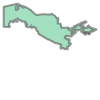

In [65]:
disruptions = gpd.read_file(os.path.join(disruption_data_folder, "roads_edges_1in1000_flooded.geojson"))
disruptions = disruptions.drop_duplicates('id')
uzb = gpd.read_file(os.path.join(admin_data_folder, "geoBoundaries-UZB-ADM0_simplified.geojson"))
disruptions = disruptions[disruptions.geometry.within(uzb.geometry.union_all())]
print(disruptions.shape)
disruptions.head()

C:\Users\Celian\miniforge3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 25 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


(21, 15)


id  end1  end2          km surface    class disruption special capacity  \
10   77    91    92  109.842680   paved  highway       None    None     None   
27  554   446    91   43.014081   paved  highway       None    None     None   
28  556   449   450   46.765919   paved  highway       None    None     None   
29  558   449   452   77.645333   paved  highway       None    None     None   
32  562   450    35  170.727895   paved  highway       None    None     None   

    name  mean_depth  flood_coverage  flood_coverage_50  flood_coverage_25  \
10  None   55.565978    25224.469198       12730.578221       19959.893626   
27  None   57.424390     4413.845096        2112.579408        3435.802654   
28  None   50.066298     3496.141956        1604.221830        2445.844492   
29  None  118.705882      457.125163         363.464655         394.684824   
32  None  250.890110     1763.668361        1728.847291        1753.720268   

                                             geometry  
10  LINESTRING (71.33182 40.57596, 72.27977 40.78368)  
27   LINESTRING (70.94856 40.5386, 71.33182 40.57596)  
28   LINESTRING (69.20982 40.79852, 69.59795 40.9201)  
29  LINESTRING (69.20982 40.79852, 69.31649 41.31827)  
32  LINESTRING (69.59795 40.9201, 70.45124 41.1534...

In [60]:
roads_edges['id']

0        0
1        1
2        2
3        3
4        4
      ... 
503    503
504    504
505    505
506    506
507    507
Name: id, Length: 508, dtype: int32

In [56]:
roads_edges =  gpd.read_file(os.path.join(model_input_folder, "roads_edges.geojson"))
print(roads_edges.shape)
roads_edges.head()

(508, 11)


id  end1  end2           km surface class disruption special capacity  \
0   0     0     1  1385.760126   paved  None       None    None     None   
1   1     2     3   132.934330   paved  None       None    None     None   
2   2     4     5     9.908933   paved  None       None    None     None   
3   3     6     7     0.914980   paved  None       None  custom     None   
4   4     8     9    59.918420   paved  None       None    None     None   

   name                                           geometry  
0  None  LINESTRING (25.22646 42.19327, 16.38534 48.35147)  
1  None    LINESTRING (80.4087 44.1841, 81.59412 44.28747)  
2  None  LINESTRING (75.02899 40.65067, 75.05619 40.71495)  
3  None  LINESTRING (73.92475 39.69426, 73.91859 39.69008)  
4  None  LINESTRING (69.32793 40.51502, 69.63493 40.403...

In [66]:
roads_edges['disruption'] = roads_edges['geometry'].map(disruptions.set_index('geometry')["flood_coverage_50"])
roads_edges['disruption'] = roads_edges['disruption'] > 1.0
roads_edges['disruption'] = roads_edges['disruption'].apply(lambda x: 'flood_1in1000_UZB' if x else None)
roads_edges['disruption'].value_counts()
roads_edges.to_file(os.path.join(model_input_folder, "roads_edges.geojson"), driver="GeoJSON")

# Road disruption

In [5]:
disruptions = gpd.read_file(os.path.join(, "disruptions_compact.geojson"))
disruptions

infra_type        length        Type special  id  road_index  \
0          None           NaN        None  border NaN           0   
1     Carretera  10499.463640  legitimate    None NaN           1   
2     Carretera  11450.214973  legitimate    None NaN           2   
3     Carretera   9729.416225  legitimate    None NaN           3   
4     Carretera  10492.111143  legitimate    None NaN           4   
...         ...           ...         ...     ...  ..         ...   
2163  Autopista           NaN        None    None NaN        2163   
2164  Autopista           NaN        None    None NaN        2164   
2165  Carretera  15642.837623  legitimate    None NaN        2165   
2166  Carretera  15642.837623  legitimate    None NaN        2166   
2167  Autopista           NaN        None    None NaN        2167   

                                             disruption  \
0                                                         
1                                         Scenario 2_50   
2                                                         
3                                                         
4                                                         
...                                                 ...   
2163                                                      
2164                                                      
2165        Scenario 0_50, Scenario 2_50, Scenario 5_50   
2166                                                      
2167  Scenario 0_20, Scenario 0_50, Scenario 2_20, S...   

                                               geometry  
0     LINESTRING (-79.96462 -4.39216, -79.96508 -4.3...  
1     LINESTRING (-77.91916 -1.64582, -77.91924 -1.6...  
2     LINESTRING (-77.89086 -1.55776, -77.89112 -1.5...  
3     LINESTRING (-77.84048 -1.62851, -77.84213 -1.6...  
4     LINESTRING (-77.80381 0.81533, -77.80363 0.815...  
...                                                 ...  
2163  LINESTRING (-78.33742 -0.19148, -78.34211 -0.1...  
2164  LINESTRING (-78.36106 -0.13062, -78.36460 -0.1...  
2165  LINESTRING (-78.39428 -0.09018, -78.38542 -0.0...  
2166  LINESTRING (-78.39428 -0.09018, -78.40812 -0.0...  
2167  LINESTRING (-78.33660 -0.21754, -78.33149 -0.2...  

[2168 rows x 8 columns]

In [6]:
disruptions['disruption'].value_counts()

                                                                                                                          1273
Scenario 2_20, Scenario 2_50                                                                                               193
Scenario 0_20, Scenario 0_50, Scenario 1_20, Scenario 1_50, Scenario 2_20, Scenario 2_50                                   102
Scenario 0_20, Scenario 0_50, Scenario 2_20, Scenario 2_50                                                                  93
Scenario 1_20, Scenario 1_50, Scenario 2_20, Scenario 2_50                                                                  64
Scenario 0_20, Scenario 0_50, Scenario 1_20, Scenario 1_50                                                                  60
Scenario 2_50                                                                                                               45
Scenario 0_50, Scenario 2_50                                                                                   

# Firm disruption

In [14]:
output_drop = pd.read_csv(os.path.join(input_folder, "earthquake_output_drop.csv"))
res = output_drop.groupby(['output_drop', 'weeks']).agg({'canton_code': pd.unique, 'trigram': pd.unique})
res

canton_code  \
output_drop weeks                
0.004153    2             1309   
0.006068    2             1301   
0.007499    2             1308   
0.010603    2             1321   
0.013404    2             1303   
0.022554    2             1322   
0.116392    2              803   
0.177236    2             1320   
0.420373    2             1317   

                                                             trigram  
output_drop weeks                                                     
0.004153    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.006068    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.007499    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.010603    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.013404    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.022554    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.116392    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.177236    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...  
0.420373    2      [ALD, AYG, AZU, BAL, BNA, CAN, CAR, CAU, CEM, ...